# Extracting and Visualizing Stock Data


## Description

In this assignment I have to retrieve Stock and Revenue Data for different companies, for that we have to prepare our environment.

## Tabel of Contents

<div style="background-color:rgb(135,206,235)";>
    <ul>
        <li>Question 1: Extracting Tesla Stock Data Using yfinance - 2 Points</li>
        <li>Question 2: Extracting Tesla Revenue Data Using Webscraping - 1 Point</li>
        <li>Question 3: Extracting GameStop Stock Data Using yfinance - 2 Points</li>
        <li>Question 4: Extracting GameStop Revenue Data Using Webscraping - 1 Point</li>
        <li>Question 5: Tesla Stock and Revenue Dashboard - 2 Points</li>
        <li>Question 6: GameStop Stock and Revenue Dashboard - 2 Points</li>
        <li>Question 7: Sharing your Assignment Notebook - 2 Points</li>
    </ul>
</div>

## Install required dependencies

In [4]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 44.0 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 10.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-cp310-cp310-linux_x86_64.whl size=280622 sha256=a036865d79775865934cceb799d866e5c074909ebcb349b8d7ea159f537ebc15
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/c7/70/ad/212867e96e7004265a69c4aa5dcff00a95f547a67ba26e7e76
Successfully built peewee


In [5]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup


## Question 1: Extracting Tesla Stock Data Using yfinance - 2 Points

In [6]:
teslaStock = yf.Ticker("TSLA")
teslaStock_data = teslaStock.history(period="max")

In [7]:
teslaStock_data.reset_index(inplace=True)
teslaStock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Extracting Tesla Revenue Data Using Webscraping - 1 Point

In [18]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the web page where the revenue data is located
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send an HTTP request to the web page
response = requests.get(url)
data = response.text

# Parse the HTML content
soup = BeautifulSoup(data, 'html5lib')

# Create a DataFrame to store the extracted data
revenue_data = pd.DataFrame(columns=["Year", "Revenue"])

# Extract the revenue data from the web page
for row in soup.find("table").find_all('tr')[1:]:  # Assuming the first row is the header
    cols = row.find_all("td")
    if len(cols) >= 2:  # Check if there are at least two columns
        year = cols[0].text.strip()
        revenue = cols[1].text.strip()

        # Use pandas.concat instead of append
        new_row = pd.DataFrame({"Year": [year], "Revenue": [revenue]})
        revenue_data = pd.concat([revenue_data, new_row], ignore_index=True)

# Table title
print("Annual Tesla Revenue Data")

# Print the extracted data
teslaRevenueData = revenue_data
print(revenue_data.head(10))  # Displaying the first 10 rows


Annual Tesla Revenue Data
   Year  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759
5  2016   $7,000
6  2015   $4,046
7  2014   $3,198
8  2013   $2,013
9  2012     $413


## Question 3: Extracting GameStop Stock Data Using yfinance - 2 Points

In [9]:
gms = yf.Ticker("GME")
gms_data = gms.history(period="max")
gms_data.reset_index(inplace=True)
gms_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Extracting GameStop Revenue Data Using Webscraping - 1 Point

In [23]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the web page where the revenue data is located
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send an HTTP request to the web page
response = requests.get(url)
data = response.text

# Parse the HTML content
soup = BeautifulSoup(data, 'html5lib')

# Create a DataFrame to store the extracted data
gme_revenue_data = pd.DataFrame(columns=["Year", "Revenue"])

# Extract the revenue data from the web page
for row in soup.find("table").find_all('tr')[1:]:  # Assuming the first row is the header
    cols = row.find_all("td")
    if len(cols) >= 2:  # Check if there are at least two columns
        year = cols[0].text.strip()
        revenue = cols[1].text.strip()

        # Use pandas.concat instead of append
        new_row = pd.DataFrame({"Year": [year], "Revenue": [revenue]})
        gme_revenue_data = pd.concat([gme_revenue_data, new_row], ignore_index=True)

# Table title
print("Annual GameStop Revenue Data")
        
# Print the extracted data
gamestopRevenueData = gme_revenue_data
print(gme_revenue_data.head(10))  # Displaying the first 10 rows


Annual GameStop Revenue Data
   Year Revenue
0  2020  $6,466
1  2019  $8,285
2  2018  $8,547
3  2017  $7,965
4  2016  $9,364
5  2015  $9,296
6  2014  $9,040
7  2013  $8,887
8  2012  $9,551
9  2011  $9,474


## Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

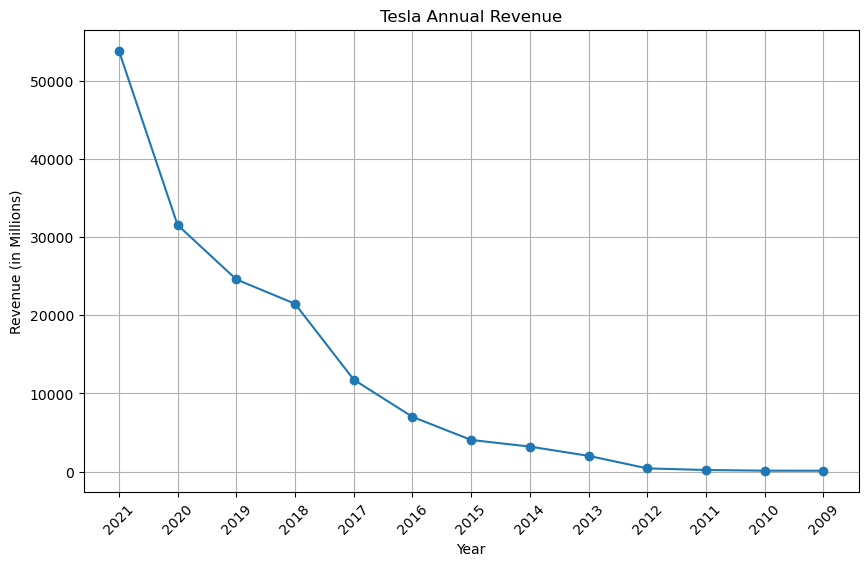

In [26]:

# Assume revenue_data is your DataFrame from the previous code
# First, convert the 'Revenue' column to a numeric format
revenue_data['Revenue'] = revenue_data['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Now, plot the graph
plt.figure(figsize=(10, 6))
plt.plot(revenue_data['Year'], revenue_data['Revenue'], marker='o')
plt.title('Tesla Annual Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (in Millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

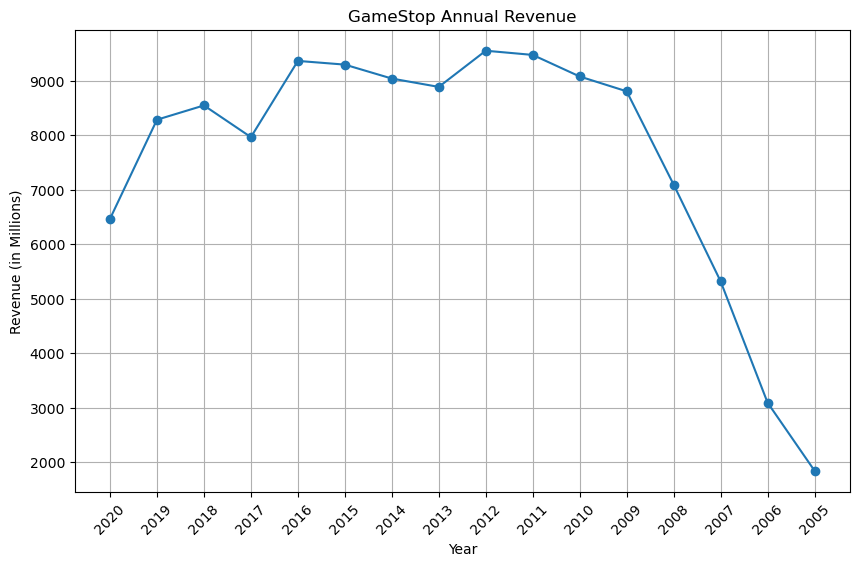

In [25]:


# Assume revenue_data is your DataFrame from the previous code
# First, convert the 'Revenue' column to a numeric format
gme_revenue_data['Revenue'] = gme_revenue_data['Revenue'].replace('[\$,]', '', regex=True).astype(float)

# Now, plot the graph
plt.figure(figsize=(10, 6))
plt.plot(gme_revenue_data['Year'], gme_revenue_data['Revenue'], marker='o')
plt.title('GameStop Annual Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (in Millions)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()